In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
import seaborn as sns
sns.set
import warnings
import sklearn.preprocessing as preproc
warnings.filterwarnings('ignore')

Here I imported all the various libraries needed to preform the task of analyzing this data set.

In [124]:
df=pd.read_csv("student_data.csv")

Firstly I uploaded the data set named "student_data.csv", then I began to use EDA Exploratary Data Analysis.

In [125]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171.0,1,1,122.0,1,19,12.0,...,0,0.0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254.0,1,1,160.0,1,1,3.0,...,0,6.0,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070.0,1,1,122.0,1,37,37.0,...,0,6.0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773.0,1,1,122.0,1,38,37.0,...,0,6.0,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014.0,0,1,100.0,1,37,38.0,...,0,6.0,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


to get an understanding of how many features this data set contained I used ".head()", 37 featurtes are in this data set, .head() will show the first 5 observations, I could aslso use .tail() this would show me the last 5 observations of the data set.

In [126]:
df.describe()

,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4423.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4423.000000,4424.000000,...,4424.000000,4424.000000,4423.000000,4424.000000,4424.000000,4423.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,18.669078,1.727848,8856.458738,0.890823,4.577758,132.613314,1.873192,19.561935,22.271987,10.960895,...,0.137658,0.541817,6.231743,8.063291,4.435805,10.229941,0.150316,11.566139,1.228029,0.001969
std,17.484682,1.313793,2063.763479,0.311897,10.216592,13.188332,6.914514,15.603186,15.343244,26.418253,...,0.690880,1.918546,2.196038,3.947951,3.014764,5.211367,0.753774,2.663850,1.382711,2.269935
min,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


then I used .describe() to review the mean, std deviation, and looked for similarities between values. If the mean and the standared deviation are close in values this would indicate a normal Gaussian distrubution. this was not the case with this data set.


In [127]:
df.shape

(4424, 37)

to know exactly how many features and observations I had I used ".shape()

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   object 
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4423 non-null   float64
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

.info() gave me which type of value was contained in each feature, I then looked at the data dictionary to compare.

In [129]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            1
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            1
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   1
Displaced                                         0
Educational special needs                         0
Debtor                                            1
Tuition fees up to date                           1
Gender                                            0
Scholarship holder                                0
Age at enrol

.isnull().sum() gave me an list of features that contained null values.

In [130]:
df["Marital status"].unique()

array(['1', '2', '4', '?', '3', '5', '6'], dtype=object)

I then began to go through all the features to find all the various types of null values "?"

In [131]:
df["Course"].unique()

array([ 171., 9254., 9070., 9773., 8014., 9991., 9500., 9238., 9670.,
       9853., 9085., 9130., 9556., 9147., 9003.,   33., 9119.,   nan])

"nan"

In [132]:
df["Father's qualification"].unique()

array([12.,  3., 37., 38.,  1., 19.,  5.,  4., 34.,  2., 39., 11.,  9.,
       nan, 36., 26., 40., 14., 20., 35., 41., 22., 13., 29., 43., 18.,
       42., 10.,  6., 30., 25., 44., 33., 27., 31.])

"nan"

In [133]:
df["Marital status"].unique()

array(['1', '2', '4', '?', '3', '5', '6'], dtype=object)

'?'

In [134]:
df["Debtor"].unique()

array([ 0.,  1., nan])

"nan"

In [135]:
missing_value_formats = ["n.a.","?","NA","n/a","na","--","nan","UnKnown","Na"]

I then used "missing_value_formats" to identify the null values, I also added in some additional null values that might have been hidden in that set.

In [136]:
df = pd.read_csv("student_data.csv",na_values=missing_value_formats)

I then re read in my data set naming it "student_no_label"

In [137]:
df.isnull().values.any()

True

here the original data set has null vales showing True

In [138]:
student_no_label = df.dropna(axis=0)

I then dropped all null values using ".dropna(axis=0) axis = observations.

In [139]:
student_no_label.isnull().values.any()

False

new data set named "student_no_label" is now showing no null values False.

In [140]:
student_no_label.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [141]:
df["Target"].unique()

array(['Dropout', 'Graduate', 'Enrolled', 'Grad', 'graduate', 'Drop',
       'dropout'], dtype=object)

I then looked at the individual characteristics of each feature, on this feature I needed to consolidate 7 words that had the same meaning to 3, "Target" this is also our dependent variable.

In [142]:
df["Target"]=df["Target"].replace({"Drop":"Dropout","Grad":"Graduate","graduate":"Graduate","dropout":"Dropout",})

i used ".replace" to consolidate from 7 to 3.

In [143]:
df["Target"].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

we can now see the 3 values using ".unique()"

In [144]:
df["Target"]=df["Target"].replace({"Dropout":"1","Graduate":"2","Enrolled":"3"})

In [145]:
df["Target"].unique()

array(['1', '2', '3'], dtype=object)

"Target" now showing 1,2,3.

after reviewing the data dictionary I realized that some features on my data set where showing as "Float" values, I then began to ammend the below features to interger's using .astype(int)

In [146]:
student_no_label["Marital status"]=student_no_label["Marital status"].astype(int)

In [147]:
student_no_label["Course"]=student_no_label["Course"].astype(int)

In [148]:
student_no_label["Father's qualification"]=student_no_label["Father's qualification"].astype(int)

In [149]:
student_no_label["Displaced"]=student_no_label["Displaced"].astype(int)

In [150]:
student_no_label["Debtor"]=student_no_label["Debtor"].astype(int)

In [151]:
student_no_label["Tuition fees up to date"]=student_no_label["Tuition fees up to date"].astype(int)

In [152]:
student_no_label["Age at enrollment"]=student_no_label["Age at enrollment"].astype(int)

In [153]:
student_no_label["Curricular units 2nd sem (enrolled)"]=student_no_label["Curricular units 2nd sem (enrolled)"].astype(int)

In [154]:
student_no_label["Curricular units 1st sem (credited)"]=student_no_label["Curricular units 1st sem (credited)"].astype(int)

In [155]:
student_no_label["Curricular units 1st sem (grade)"]=student_no_label["Curricular units 1st sem (grade)"].astype(int)

In [156]:
student_no_label["Curricular units 1st sem (credited)"]=student_no_label["Curricular units 1st sem (credited)"].astype(int)

In [157]:
student_no_label["Curricular units 2nd sem (grade)"]=student_no_label["Curricular units 2nd sem (grade)"].astype(int)

In [158]:
student_no_label.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13,0,13.9,-0.3,0.79,Graduate


Here we see the full list of features in there correct types according to the data dictionary.

In [159]:
student_no_label.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,...,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000
mean,1.178644,18.671276,1.728406,8861.600091,0.890954,4.585355,132.628202,1.866697,19.566992,22.268647,...,0.137837,0.540920,6.233280,8.062798,4.437089,9.912038,0.150079,11.569848,1.230855,0.005933
std,0.606321,17.470528,1.313857,2053.895552,0.311732,10.228951,13.191683,6.899433,15.601303,15.339888,...,0.691739,1.919193,2.192905,3.944444,3.013473,5.054440,0.754525,2.663520,1.381920,2.267564
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.000000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.000000,0.000000,13.900000,2.600000,1.790000
max,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000


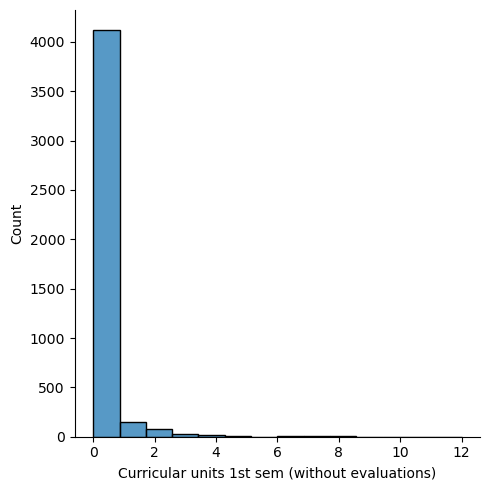

In [160]:
sns.displot(data=student_no_label, x = "Curricular units 1st sem (without evaluations)")

In [161]:
student_no_label["Curricular units 1st sem (without evaluations)"] = preproc.minmax_scale(student_no_label["Curricular units 1st sem (without evaluations)"])

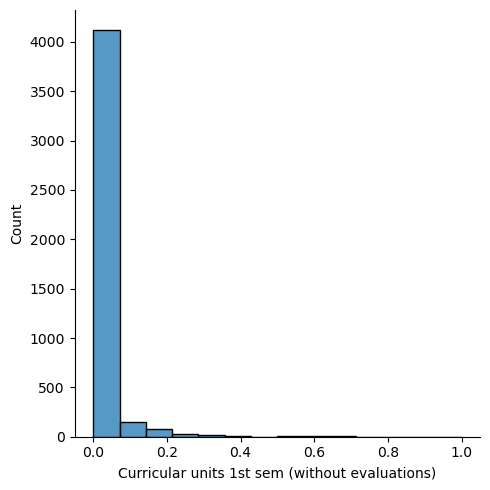

In [162]:
sns.displot(data=student_no_label, x = "Curricular units 1st sem (without evaluations)")

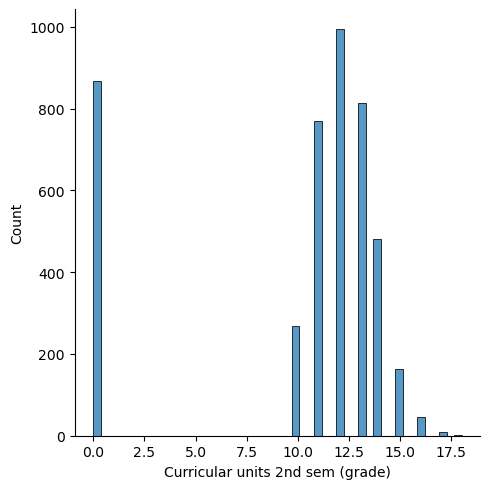

In [163]:
sns.displot(data=student_no_label, x = "Curricular units 2nd sem (grade)")

In [164]:
student_no_label["Curricular units 2nd sem (grade)"] = preproc.minmax_scale(student_no_label["Curricular units 2nd sem (grade)"])

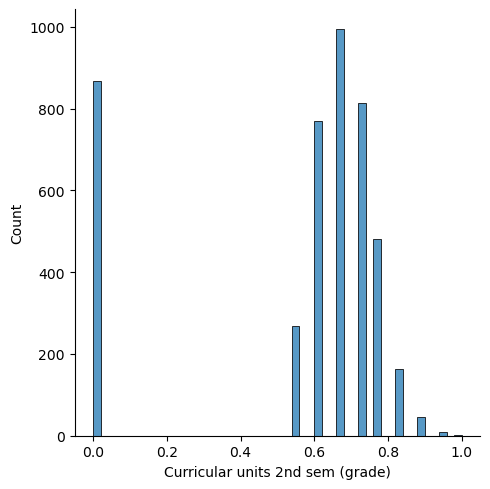

In [165]:
sns.displot(data=student_no_label, x = "Curricular units 2nd sem (grade)")

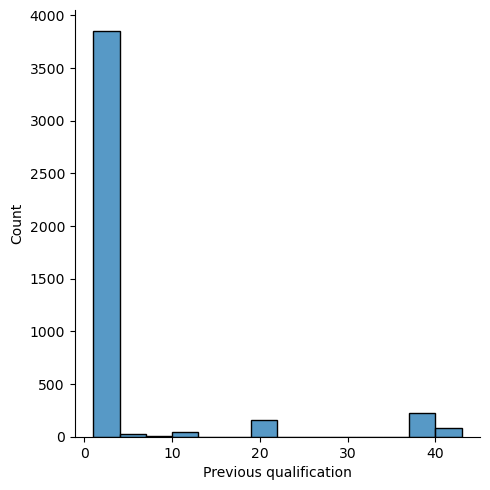

In [166]:
sns.displot(data=student_no_label, x = "Previous qualification")

In [167]:
student_no_label["Previous qualification"] = preproc.minmax_scale(student_no_label["Previous qualification"])

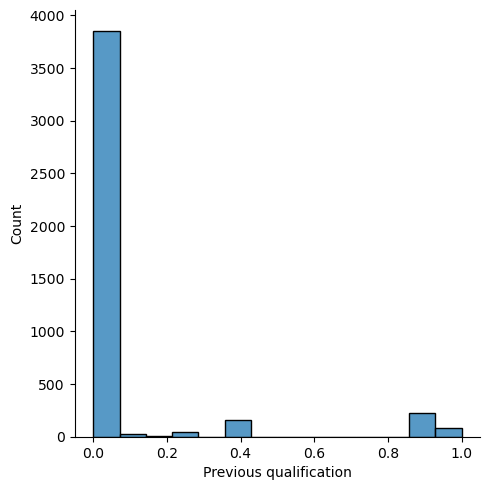

In [168]:
sns.displot(data=student_no_label, x = "Previous qualification")

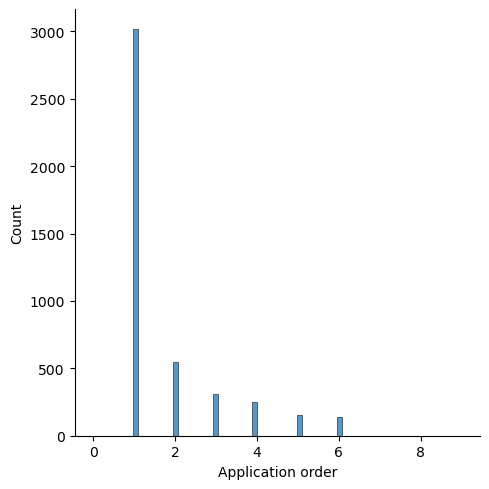

In [169]:
sns.displot(data=student_no_label, x = "Application order")

In [170]:
student_no_label["Application order"] = preproc.minmax_scale(student_no_label["Application order"])

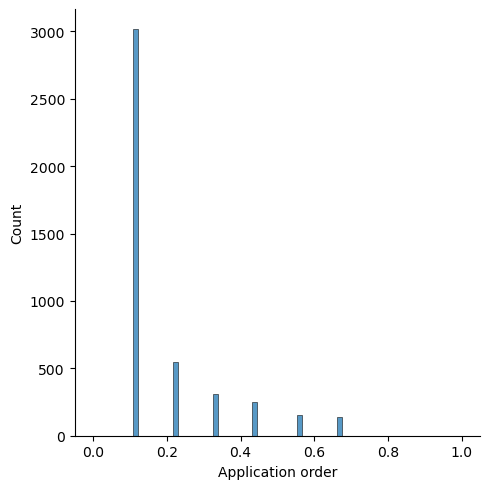

In [171]:
sns.displot(data=student_no_label, x = "Application order")

In [172]:
student_no_label.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,...,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000
mean,1.178644,18.671276,0.192045,8861.600091,0.890954,0.085366,132.628202,1.866697,19.566992,22.268647,...,0.011486,0.540920,6.233280,8.062798,4.437089,0.550669,0.150079,11.569848,1.230855,0.005933
std,0.606321,17.470528,0.145984,2053.895552,0.311732,0.243546,13.191683,6.899433,15.601303,15.339888,...,0.057645,1.919193,2.192905,3.944444,3.013473,0.280802,0.754525,2.663520,1.381920,2.267564
min,1.000000,1.000000,0.000000,33.000000,0.000000,0.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,0.111111,9085.000000,1.000000,0.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,0.555556,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,0.111111,9238.000000,1.000000,0.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,0.666667,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,0.222222,9556.000000,1.000000,0.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,0.722222,0.000000,13.900000,2.600000,1.790000
max,6.000000,53.000000,1.000000,9991.000000,1.000000,1.000000,190.000000,109.000000,44.000000,44.000000,...,1.000000,19.000000,23.000000,33.000000,20.000000,1.000000,12.000000,16.200000,3.700000,3.510000


In [173]:
student_no_label.drop(columns=["Target"], inplace=True)


I then removed the dependent variable named "Target", this is essential before we can begin "PCA" Principal Component Analysis

In [174]:
student_no_label.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,0.555556,171,1,0.0,122.0,1,19,12,...,0.0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,0.111111,9254,1,0.0,160.0,1,1,3,...,0.0,0,6,6,6,0.722222,0,13.9,-0.3,0.79
2,1,1,0.555556,9070,1,0.0,122.0,1,37,37,...,0.0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,0.222222,9773,1,0.0,122.0,1,38,37,...,0.0,0,6,10,5,0.666667,0,9.4,-0.8,-3.12
4,2,39,0.111111,8014,0,0.0,100.0,1,37,38,...,0.0,0,6,6,6,0.722222,0,13.9,-0.3,0.79


We now see 36 features after removing "Target".

In [175]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

I installed all the above libaries.

In [176]:
pca = PCA().fit(student_no_label)

We now load our data set named "student_no_label" into "PCA"

Text(0, 0.5, 'cumulative explained variance')

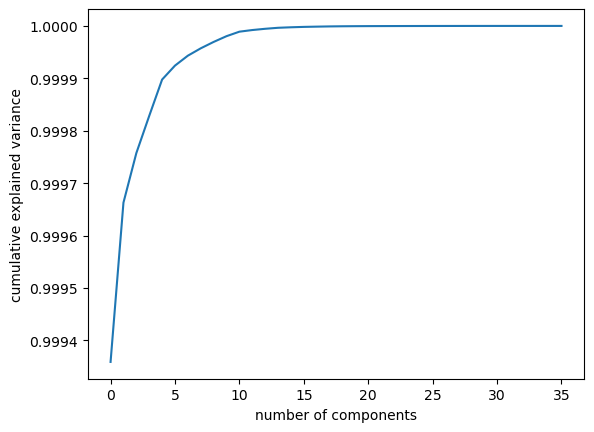

In [177]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")

This graph illistrates the number of components required to maintain a minium of 99.5% of the signal held in the origianl data set. I have chosen 8 features.

In [178]:
pca.components_

array([[-1.35542676e-05, -5.35207359e-04, -4.30678650e-06, ...,
        -6.40043418e-06, -1.03667021e-05,  2.36493320e-05],
       [ 7.41424388e-04,  3.11170763e-02, -1.78626733e-04, ...,
        -7.58862218e-03,  1.10164712e-03,  8.15201866e-03],
       [-8.87492162e-03, -4.74902981e-01,  1.30436463e-03, ...,
         5.93263532e-03, -3.11713027e-03,  1.09122574e-02],
       ...,
       [ 2.99462278e-03,  6.93174289e-05, -5.39977036e-02, ...,
        -2.52049491e-03, -8.12412229e-04, -1.51779119e-03],
       [ 6.74885545e-03, -7.33616589e-05,  1.93764885e-02, ...,
         3.25800096e-04,  3.41718453e-04, -9.76922003e-04],
       [-1.83484583e-03,  5.71649910e-05,  8.52956255e-03, ...,
         2.02748937e-03,  2.00365446e-03,  2.65995748e-03]])

This is our new feature list maintaining 95.5% of the original signal.

In [179]:
pca.explained_variance_

array([4.21850310e+06, 1.28324364e+03, 3.98909444e+02, 2.99799791e+02,
       2.92719221e+02, 1.12325346e+02, 8.00206864e+01, 5.93179282e+01,
       5.14226163e+01, 4.63614021e+01, 3.62052346e+01, 1.31926769e+01,
       1.00606758e+01, 8.07195325e+00, 4.05044932e+00, 3.20482012e+00,
       1.99724478e+00, 1.80373295e+00, 1.17661135e+00, 7.37804069e-01,
       5.21218864e-01, 2.72956833e-01, 2.39509213e-01, 2.17278319e-01,
       1.84803189e-01, 1.56491186e-01, 1.26877924e-01, 1.13404363e-01,
       7.04211062e-02, 5.75488606e-02, 4.39513497e-02, 1.71207374e-02,
       1.41163373e-02, 1.13116110e-02, 8.95405630e-03, 1.93464528e-03])

Here we can see the signal value of each observations, 4.21850617e+06 = 4 % for example.

In [180]:
pca =PCA(8)
projected = pca.fit_transform(student_no_label)

we now transform the total number of new features to 8

In [181]:
projected.shape

(4411, 8)

new data set has  8 new features and 4411 observations

Note: our observations have been reduced from our original data set from (4424) to (4411)after we removed null values.
and the features have now been reduced from 37 to 8 new features.

In [182]:
projected

array([[ 8.69061224e+03, -9.09670154e-01, -1.89510534e+00, ...,
         6.70999612e+00, -5.88443923e+00, -3.40609212e+00],
       [-3.92350059e+02, -1.37557549e+01,  3.06464600e+01, ...,
         4.58003763e-01,  1.03798917e+01, -1.29306936e+00],
       [-2.08386907e+02, -2.09260499e+00, -1.14928579e+01, ...,
         2.92798903e+00, -5.84695128e+00,  2.05071839e-01],
       ...,
       [-6.38374787e+02, -3.05627348e+00, -5.12391390e+00, ...,
         3.41888641e+00,  1.54372761e-01,  3.17254825e-01],
       [-2.85348511e+02, -8.17715891e+00,  5.65069318e-01, ...,
         2.04936405e+00,  1.81256559e+01, -4.12958489e-01],
       [-9.11368760e+02, -5.80211343e+00, -7.67648157e+00, ...,
         3.82367666e+00, -5.52520134e-01,  8.07022143e-01]])

As these are new features we need to name them, below they are named A1 to A8.

In [183]:
student_pca =pd.DataFrame(projected,columns= ["A1","A2","A3","A4","A5","A6","A7","A8"])

In [184]:
student_pca.head()

,A1,A2,A3,A4,A5,A6,A7,A8
0,8690.612245,-0.909670,-1.895105,-8.136566,13.765585,6.709996,-5.884439,-3.406092
1,-392.350059,-13.755755,30.646460,23.704817,-10.723005,0.458004,10.379892,-1.293069
2,-208.386907,-2.092605,-11.492858,-24.365067,-14.251037,2.927989,-5.846951,0.205072
3,-911.420071,-8.994291,-20.441832,-15.605460,-4.415244,2.287403,-2.629272,1.212777
4,847.567387,-0.124222,-36.794626,3.811266,9.117390,3.349117,-34.256615,4.157979


Here we see the new data set named " student_pca.head" with the new feature names

In [185]:
student_pca["Target"]=df["Target"]

In [186]:
student_pca.head()

,A1,A2,A3,A4,A5,A6,A7,A8,Target
0,8690.612245,-0.909670,-1.895105,-8.136566,13.765585,6.709996,-5.884439,-3.406092,1
1,-392.350059,-13.755755,30.646460,23.704817,-10.723005,0.458004,10.379892,-1.293069,2
2,-208.386907,-2.092605,-11.492858,-24.365067,-14.251037,2.927989,-5.846951,0.205072,1
3,-911.420071,-8.994291,-20.441832,-15.605460,-4.415244,2.287403,-2.629272,1.212777,2
4,847.567387,-0.124222,-36.794626,3.811266,9.117390,3.349117,-34.256615,4.157979,2


In [187]:
student_pca.describe()

,A1,A2,A3,A4,A5,A6,A7,A8
count,4.411000e+03,4.411000e+03,4.411000e+03,4.411000e+03,4.411000e+03,4.411000e+03,4.411000e+03,4.411000e+03
mean,-3.397976e-13,9.278454e-16,-1.958785e-15,-7.835139e-15,4.355719e-15,-5.541299e-16,1.483264e-14,-2.532245e-15
std,2.053899e+03,3.582239e+01,1.997272e+01,1.731473e+01,1.710904e+01,1.059837e+01,8.945428e+00,7.701813e+00
min,-1.129568e+03,-1.860878e+01,-4.720536e+01,-5.072334e+01,-5.706896e+01,-2.991695e+01,-5.211267e+01,-6.909632e+01
25%,-6.944079e+02,-9.977733e+00,-1.500470e+01,-1.249474e+01,-1.140748e+01,-4.927505e+00,-4.260829e+00,-1.707735e+00
50%,-3.764244e+02,-6.653314e+00,7.602791e-01,-2.107224e+00,1.853127e-01,1.620742e+00,-4.021521e-01,-8.177977e-02
75%,-2.234086e+02,-3.358178e+00,1.502159e+01,1.075005e+01,1.167356e+01,3.171872e+00,4.175158e+00,1.460576e+00
max,8.828611e+03,2.593684e+02,5.550386e+01,7.246170e+01,5.971279e+01,3.378068e+01,5.285731e+01,1.289340e+02


In [188]:
student_pca["Target"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4411 entries, 0 to 4410
Series name: Target
Non-Null Count  Dtype 
--------------  ----- 
4411 non-null   object
dtypes: object(1)
memory usage: 34.6+ KB


In [189]:
student_pca["Target"].describe()

count     4411
unique       3
top          2
freq      2202
Name: Target, dtype: object

In [190]:
student_pca.describe()

,A1,A2,A3,A4,A5,A6,A7,A8
count,4.411000e+03,4.411000e+03,4.411000e+03,4.411000e+03,4.411000e+03,4.411000e+03,4.411000e+03,4.411000e+03
mean,-3.397976e-13,9.278454e-16,-1.958785e-15,-7.835139e-15,4.355719e-15,-5.541299e-16,1.483264e-14,-2.532245e-15
std,2.053899e+03,3.582239e+01,1.997272e+01,1.731473e+01,1.710904e+01,1.059837e+01,8.945428e+00,7.701813e+00
min,-1.129568e+03,-1.860878e+01,-4.720536e+01,-5.072334e+01,-5.706896e+01,-2.991695e+01,-5.211267e+01,-6.909632e+01
25%,-6.944079e+02,-9.977733e+00,-1.500470e+01,-1.249474e+01,-1.140748e+01,-4.927505e+00,-4.260829e+00,-1.707735e+00
50%,-3.764244e+02,-6.653314e+00,7.602791e-01,-2.107224e+00,1.853127e-01,1.620742e+00,-4.021521e-01,-8.177977e-02
75%,-2.234086e+02,-3.358178e+00,1.502159e+01,1.075005e+01,1.167356e+01,3.171872e+00,4.175158e+00,1.460576e+00
max,8.828611e+03,2.593684e+02,5.550386e+01,7.246170e+01,5.971279e+01,3.378068e+01,5.285731e+01,1.289340e+02


In [191]:
student_pca.shape

(4411, 9)

In [192]:
student_pca.isnull().sum()

A1        0
A2        0
A3        0
A4        0
A5        0
A6        0
A7        0
A8        0
Target    0
dtype: int64

In [193]:
student_array = student_pca.values

In [194]:
student_array

array([[8690.612244849714, -0.9096701542698742, -1.8951053392323314, ...,
        -5.884439231727799, -3.406092115881916, '1'],
       [-392.3500585630828, -13.755754896869249, 30.646459964176273, ...,
        10.379891689701697, -1.2930693582432689, '2'],
       [-208.3869066228331, -2.0926049920240217, -11.492857927192905,
        ..., -5.846951280864886, 0.2050718385313963, '1'],
       ...,
       [-638.3747874079346, -3.0562734819328163, -5.1239139007210355,
        ..., 0.15437276148304516, 0.3172548248589555, '1'],
       [-285.3485111030649, -8.177158908236239, 0.5650693181619477, ...,
        18.1256558737633, -0.41295848908415655, '2'],
       [-911.3687599436324, -5.802113433128406, -7.676481568574672, ...,
        -0.5525201335002974, 0.8070221426638879, '2']], dtype=object)

In [195]:
from sklearn.model_selection import train_test_split
X = student_array[:,0:8]
y = student_array[:,8]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=30, random_state=1)

In [196]:
X_train.shape, X_validation.shape, Y_train.shape, Y_validation.shape

((4381, 8), (30, 8), (4381,), (30,))

In [197]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [198]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.500343 (0.003683)
LDA: 0.500343 (0.004735)
KNN: 0.434377 (0.019881)
CART: 0.385075 (0.020604)
NB: 0.488474 (0.012063)
SVM: 0.495091 (0.007843)


In [199]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [201]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))

0.3333333333333333
[[ 0 12  0]
 [ 0 10  0]
 [ 0  8  0]]
